In [1]:
import pandas as pd, numpy as np
pd.options.display.max_columns = 200
gp = pd.read_csv('data/google_playstore.csv', low_memory=False)
ap = pd.read_csv('data/apple_store.csv', low_memory=False)
gp.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/google_playstore.csv'

In [2]:
gp = pd.read_csv('data/google_playstore.csv')

ap = pd.read_csv('data/apple_store.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/google_playstore.csv'

In [3]:
import os

os.getcwd()|

SyntaxError: invalid syntax (3273282613.py, line 3)

In [4]:
import os

os.getcwd()

'c:\\Users\\mayan\\Desktop\\mobile-app-analysis\\notebooks'

In [5]:
gp = pd.read_csv('data/google_playstore.csv')

ap = pd.read_csv('data/apple_store.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/google_playstore.csv'

In [6]:
import os
os.chdir("C:/Users/mayan/Desktop/mobile-app-analysis")
print(os.getcwd())

C:\Users\mayan\Desktop\mobile-app-analysis


In [7]:
gp = pd.read_csv('data/google_playstore.csv')
ap = pd.read_csv('data/apple_store.csv')

In [8]:
import pandas as pd, numpy as np
pd.options.display.max_columns = 200
gp = pd.read_csv('data/google_playstore.csv', low_memory=False)
ap = pd.read_csv('data/apple_store.csv', low_memory=False)
gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
gp.shape, ap.shape
gp.info()
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ----

In [10]:
gp_clean = clean_google(gp)
ap_clean = clean_apple(ap)
gp_clean.head()
ap_clean.head()

NameError: name 'clean_google' is not defined

In [11]:
import pandas as pd
import numpy as np

def clean_google(df):
    df = df.copy()
    df.columns = [c.strip() for c in df.columns]
    df = df.drop_duplicates()
    
    # Installs
    if 'Installs' in df.columns:
        df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
        df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0).astype(int)
    else:
        df['Installs'] = 0

    # Price
    if 'Price' in df.columns:
        df['Price'] = df['Price'].astype(str).str.replace('[$,]', '', regex=True)
        df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)
    else:
        df['Price'] = 0.0

    # Rating
    if 'Rating' in df.columns:
        df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

    # Reviews
    if 'Reviews' in df.columns:
        df['Reviews'] = pd.to_numeric(df['Reviews'].astype(str).str.replace(',', ''), errors='coerce').fillna(0)
    else:
        df['Reviews'] = 0

    # Size → MB
    def size_to_mb(x):
        x = str(x)
        if 'M' in x:
            return float(x.replace('M', ''))
        if 'k' in x.lower():
            return float(x.replace('k', '')) / 1024
        return np.nan

    if 'Size' in df.columns:
        df['SizeMB'] = df['Size'].apply(size_to_mb)
    else:
        df['SizeMB'] = np.nan

    df['IsPaid'] = (df['Price'] > 0).astype(int)
    df['log_installs'] = np.log1p(df['Installs'])
    return df


def clean_apple(df):
    df = df.copy()
    df.columns = [c.strip() for c in df.columns]
    df = df.drop_duplicates()

    if 'price' in df.columns:
        df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)
    else:
        df['price'] = 0

    if 'user_rating' in df.columns:
        df['user_rating'] = pd.to_numeric(df['user_rating'], errors='coerce')

    if 'size_bytes' in df.columns:
        df['size_mb'] = pd.to_numeric(df['size_bytes'], errors='coerce') / 1e6
    else:
        df['size_mb'] = np.nan

    df['IsPaid'] = (df['price'] > 0).astype(int)
    return df

In [12]:
gp_clean = clean_google(gp)
ap_clean = clean_apple(ap)
gp_clean.head()
ap_clean.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,IsPaid
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.788224,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,158.578688,0
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,100.524032,0
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,128.512000,0
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,92.774400,0


In [13]:
gp_clean.to_csv('outputs/cleaned_google.csv', index=False)
ap_clean.to_csv('outputs/cleaned_apple.csv', index=False)

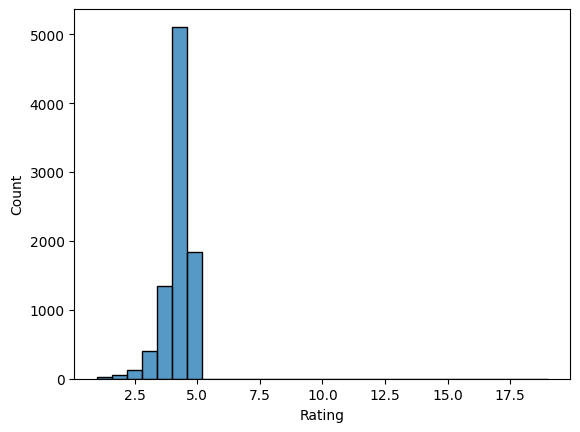

In [14]:
import seaborn as sns, matplotlib.pyplot as plt
sns.histplot(gp_clean['Rating'].dropna(), bins=30)
plt.show()

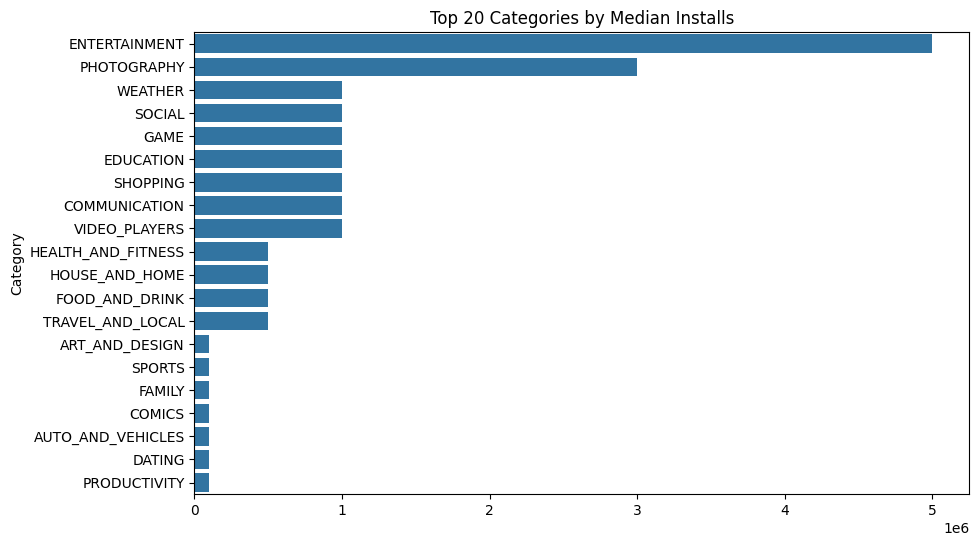

In [15]:
top_cat = gp_clean.groupby('Category')['Installs'].median().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_cat.index, x=top_cat.values)
plt.title("Top 20 Categories by Median Installs")
plt.show()

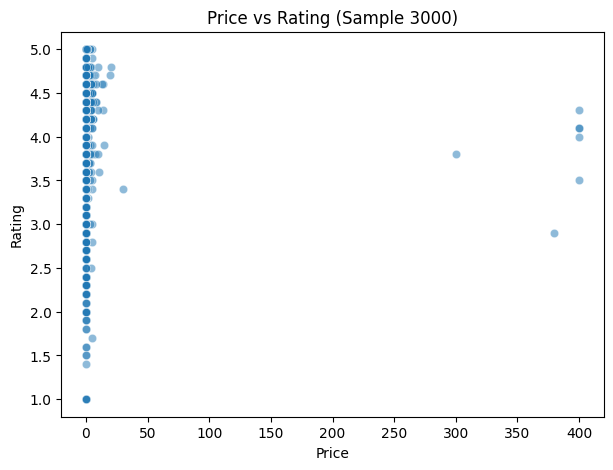

In [16]:
sample = gp_clean.sample(3000, random_state=42)

plt.figure(figsize=(7,5))
sns.scatterplot(data=sample, x='Price', y='Rating', alpha=0.5)
plt.title("Price vs Rating (Sample 3000)")
plt.show()

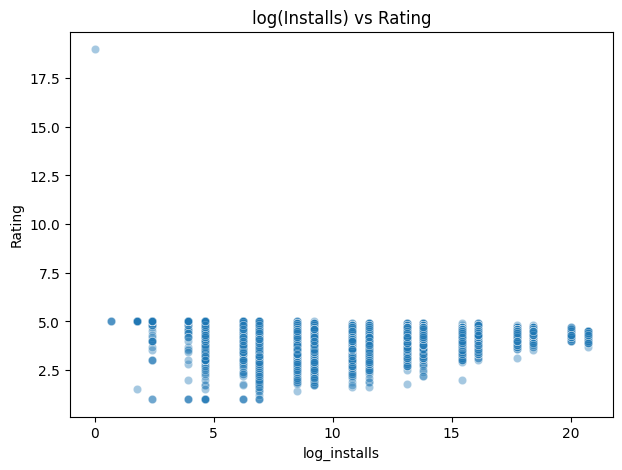

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=gp_clean['log_installs'], y=gp_clean['Rating'], alpha=0.4)
plt.title("log(Installs) vs Rating")
plt.show()

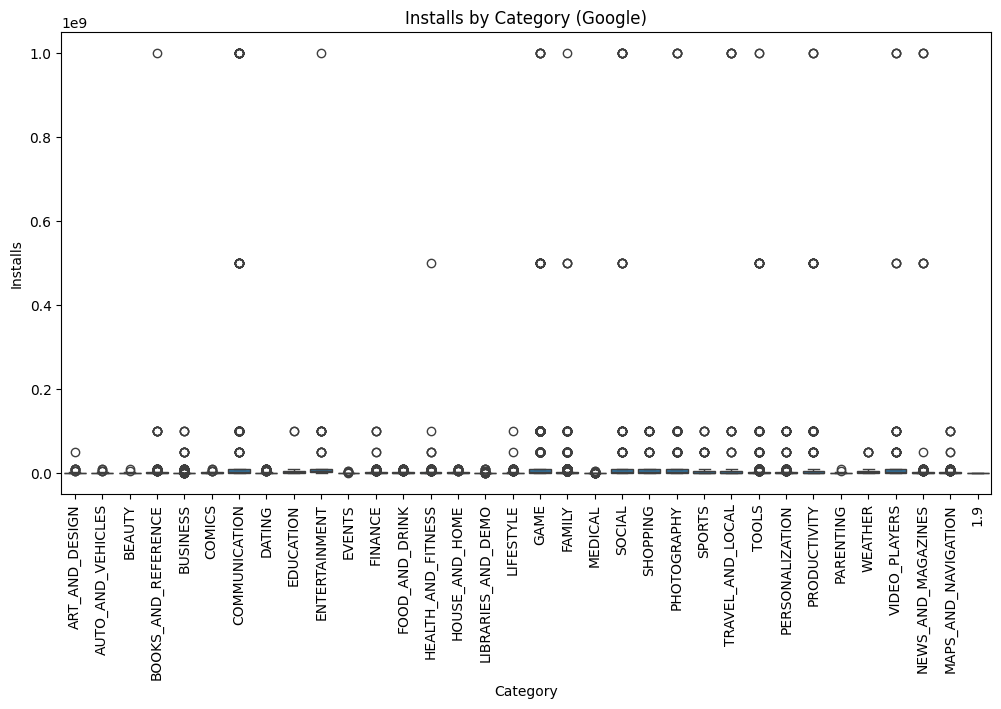

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=gp_clean, x='Category', y='Installs')
plt.xticks(rotation=90)
plt.title("Installs by Category (Google)")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = gp_clean[['log_installs', 'Rating', 'Price', 'Reviews', 'SizeMB']].fillna(0)

scaler = StandardScaler()
X = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
gp_clean['cluster'] = kmeans.fit_predict(X)

gp_clean[['App', 'Category', 'cluster']].head()

,App,Category,cluster
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0
1,Coloring book moana,ART_AND_DESIGN,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0


In [20]:
cluster_summary = gp_clean.groupby('cluster').agg({
    'Installs': 'median',
    'Rating': 'median',
    'Price': 'median',
    'Reviews': 'median',
    'App': 'count'
}).rename(columns={'App':'count'})

cluster_summary

,Installs,Rating,Price,Reviews,count
cluster,,,,,
0,1.000000e+05,4.3,0.00,2689.0,7029
1,1.000000e+02,1.9,0.00,1.0,1550
2,1.000000e+06,4.3,0.00,34465.5,1748
3,5.000000e+03,3.8,399.99,190.5,18
4,1.000000e+09,4.5,0.00,66509917.0,13


In [21]:
gp_clean.to_csv('outputs/gp_clustered.csv', index=False)